Bayesian Clustering for Customer Segmentation

**Business Context:** Understanding customer heterogeneity is critical for personalised marketing, product recommendations, and strategic planning.Traditional clustering methods often lack uncertainty quantification. Bayesian clustering using Gaussian Mixture Models (GMM) with priors allows us to infer latent segments while capturing uncertainty in segment membership.

**Question:** How can we identify latent customer segments based on behavioural data using Bayesian clustering?

**Approach:**
- Generate synthetic customer data (e.g., frequency, spend, tenure)
- Fit a Bayesian Gaussian Mixture Model
- Visualize clusters and posterior probabilities
- Provide strategic insights and actionable guidance

 **Keywords:** Bayesian clustering, customer segmentation, Gaussian Mixture Model, probabilistic inference

In [3]:
# --- Notebook Setup & Imports ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler

# --- Generate Synthetic Customer Data ---
np.random.seed(42)
n_customers = 5000

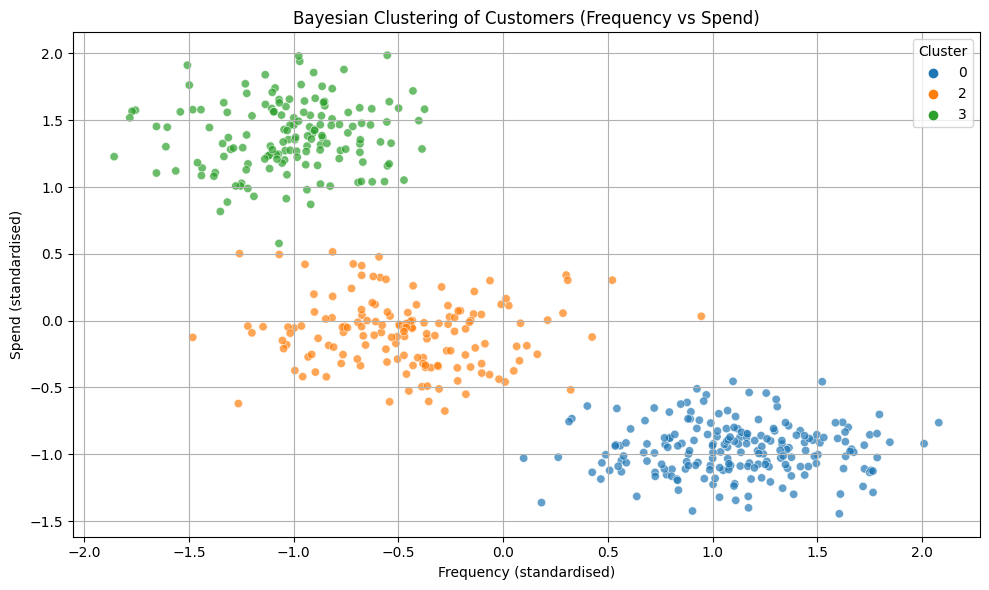

Cluster Summary Statistics:
        Frequency                  Spend                Tenure          
             mean       std         mean        std       mean       std
Cluster                                                                 
0        5.036933  0.705070   204.479072  66.193510   6.029963  1.026925
2        2.066812  0.736251   507.238815  88.040080  11.826061  1.385468
3        1.020481  0.581520  1020.132951  88.715006  23.982815  1.696942


In [4]:
# --- Simulation Function for three latent segments---


segment_1 = np.random.multivariate_normal([2, 500, 12], [[0.5, 0, 0], [0, 10000, 0], [0, 0, 2]], size=150)
segment_2 = np.random.multivariate_normal([5, 200, 6], [[0.5, 0, 0], [0, 5000, 0], [0, 0, 1]], size=200)
segment_3 = np.random.multivariate_normal([1, 1000, 24], [[0.3, 0, 0], [0, 8000, 0], [0, 0, 3]], size=150)

data = np.vstack([segment_1, segment_2, segment_3])
features = ['Frequency', 'Spend', 'Tenure']

# --- Standardise Data ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# --- Fit Bayesian Gaussian Mixture Model ---
bgmm = BayesianGaussianMixture(n_components=10, covariance_type='full', random_state=42)
bgmm.fit(data_scaled)
labels = bgmm.predict(data_scaled)
probs = bgmm.predict_proba(data_scaled)

# --- Visualise Clusters ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=labels, palette='tab10', alpha=0.7)
plt.title('Bayesian Clustering of Customers (Frequency vs Spend)')
plt.xlabel('Frequency (standardised)')
plt.ylabel('Spend (standardised)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Cluster Summary ---
import pandas as pd
df = pd.DataFrame(data, columns=features)
df['Cluster'] = labels
summary = df.groupby('Cluster').agg(['mean', 'std'])
print("Cluster Summary Statistics:")
print(summary)

--- Executive Summary & Strategic Recommendation ---

**Strategic Insight:**

- **Bayesian clustering** reveals latent customer segments with distinct behavioural profiles
- **Segment membership** is probabilistic, allowing for uncertainty-aware targeting
- **Some clusters** show high spend but low frequency, indicating potential for upsell
- **Recommendation** Use Bayesian clustering to segment customers for personalised marketing, also target high-value clusters with retention and loyalty programs. And finally, monitor segment evolution over time to detect behavioural shits.

**Actionable Guidance:**
- Integrate Bayesian clustering into CRM systems to enable dynamic segmentation
- Use posterior probabilities to prioritize outreach to customers with uncertain segment membership
- Combine clustering with LTV models to rank segments by strategic value
- Re-train models periodically to capture seasonal or trend-driven shifts in customer behaviour